In [14]:
from main_package import *

Number of particle inside the unit cell with length 25.2 $\AA$

In [41]:
# # Estimate from the density ~ 1g/cm^3
# N1 = (25.2*10**-10)**3 * 6.02*10**23 / (18*10**-6)

# print(N1)

535.2117119999999


In [6]:
9 /2.94

3.061224489795918

In [7]:
(9*10**-10)**3 * 6.022*10**23 / (18*10**-6)

24.389099999999996

In [ ]:
data1 = position_distribution("./NumericalII2022/MDTutorial/Exercises/Exc1/Run6-t300-step20000/combineO1O16.txt")
data1.sample_dis()

In [110]:
counts, bins = np.histogram(data1.dis_r, bins=100)

print(counts)
print(bins)

[  34  372 1386 2798 3980 4186 3600 2880 2042 1360  978  618  452  410
  302  306  288  308  308  258  320  400  392  466  496  546  586  600
  638  710  728  804  770  906  920  926 1010  972  958 1006 1044  990
 1068  956  952  888  930  876  874  784  780  732  664  702  664  574
  540  494  434  406  326  336  332  246  216  256  218  218  174  150
  160  114  104   98   98   78   88   66   58   52   22   42   18   26
   22   20   14   18   20    6    8    8    6    4    0    0    2    0
    2    2]
[2.48164026 2.53505991 2.58847957 2.64189922 2.69531888 2.74873853
 2.80215819 2.85557784 2.9089975  2.96241715 3.01583681 3.06925646
 3.12267611 3.17609577 3.22951542 3.28293508 3.33635473 3.38977439
 3.44319404 3.4966137  3.55003335 3.60345301 3.65687266 3.71029232
 3.76371197 3.81713162 3.87055128 3.92397093 3.97739059 4.03081024
 4.0842299  4.13764955 4.19106921 4.24448886 4.29790852 4.35132817
 4.40474782 4.45816748 4.51158713 4.56500679 4.61842644 4.6718461
 4.72526575 4.77868541 

In [117]:
# Normalize RDF to ensure it approaches 1 at large r
# Pick the tail of the RDF (e.g., last 10-20 values)
tail_avg = np.mean(rdf[-20:])
rdf_normalized = rdf / tail_avg


In [118]:
print(rdf_normalized)

[2.19665946e+01 2.30523065e+02 8.24503080e+02 1.59915120e+03
 2.18715159e+03 2.21348771e+03 1.83306629e+03 1.41309035e+03
 9.66112909e+02 6.20852194e+02 4.31060151e+02 2.63148164e+02
 1.86044725e+02 1.63220826e+02 1.16345372e+02 1.14141625e+02
 1.04068250e+02 1.07868677e+02 1.04597981e+02 8.50007950e+01
 1.02324738e+02 1.24196379e+02 1.18232984e+02 1.36591039e+02
 1.41343766e+02 1.51327006e+02 1.58021321e+02 1.57479701e+02
 1.63044427e+02 1.76729130e+02 1.76560797e+02 1.90053926e+02
 1.77464111e+02 2.03650094e+02 2.01750694e+02 1.98170912e+02
 2.10998691e+02 1.98279966e+02 1.90877193e+02 1.95830990e+02
 1.98607230e+02 1.84100274e+02 1.94189700e+02 1.70003192e+02
 1.65609991e+02 1.51153012e+02 1.54932546e+02 1.42862793e+02
 1.39565843e+02 1.22611662e+02 1.19495539e+02 1.09875533e+02
 9.76743276e+01 1.01218457e+02 9.38613947e+01 7.95630689e+01
 7.34102752e+01 6.58771277e+01 5.67834345e+01 5.21267070e+01
 4.10800373e+01 4.15629827e+01 4.03212100e+01 2.93380420e+01
 2.53000576e+01 2.945434

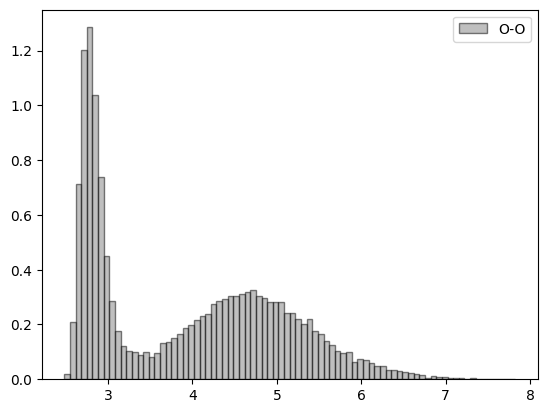

In [3]:
data1.plot(bins=80)

In [ ]:
gr = np.zeros(100)
# print(gr)

min_data = np.min(data1.dis_r)
max_data = np.max(data1.dis_r)
# for i in range(len(gr)):
# print(min_data)
# print(max_data)

v = np.linspace(min_data, max_data, len(gr)+1)

# print(v)

np.float64(0.009591590864817041)

In [27]:
from numba import jit

In [34]:
@jit
def radial_distribution(data, length):
    gr = np.zeros(100)
    min_data = np.min(data)
    max_data = np.max(data)

    v = np.linspace(min_data, max_data, len(gr)+1)

    epsilon = 0.2
    # dr = 0.1
    for i in range(len(gr)):
        r = (v[i+1] + v[i])/2
        dr = (v[i+1] - v[i])
        # number = np.count_nonzero((np.array(data1.dis_r) > v[i]-epsilon) & (epsilon + v[i+1] > np.array(data1.dis_r)))
        inner_number = np.count_nonzero((np.array(data) < v[i]-epsilon))# & (epsilon + v[i+1] > np.array(data2.dis_r)))
        outer_number = np.count_nonzero((np.array(data) < v[i]+epsilon))
        gr[i] = (outer_number-inner_number)/4/np.pi/v[i]**2/2/epsilon#/np.shape(data1.dis_r)
    normalzie = np.shape(data)/(4/3*np.pi*np.max(data)**3)#*0.73**3*4/3*np.pi
    return gr/normalzie

In [35]:
gr = radial_distribution(data1.dis_r, 50)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<function min at 0x73c5f80b4540>) found for signature:
 
 >>> min(reflected list(float64)<iv=None>)
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
      Overload of function 'min': File: numba/np/old_arraymath.py: Line 490.
        With argument(s): '(reflected list(float64)<iv=None>)':
       No match.

During: resolving callee type: Function(<function min at 0x73c5f80b4540>)
During: typing of call at /tmp/ipykernel_209436/3238858619.py (4)


File "../../../../../tmp/ipykernel_209436/3238858619.py", line 4:
<source missing, REPL/exec in use?>

During: Pass nopython_type_inference

(2.388745852952966, 12.5)

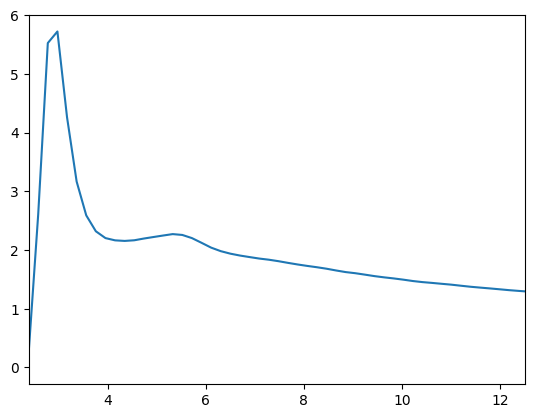

In [17]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(min_data, max_data, len(gr)), gr/2)
plt.xlim(min_data,12.5)

(2.388745852952966, 12.5)

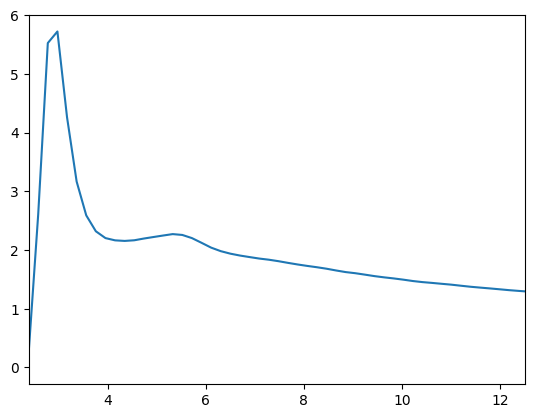

In [16]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(min_data, max_data, len(gr)), gr/2)
plt.xlim(min_data,12.5)

(2.388745852952966, 12.5)

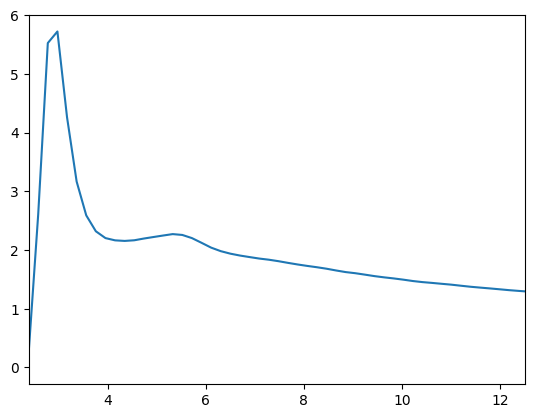

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(min_data, max_data, len(gr)), gr/2)
plt.xlim(min_data,12.5)

In [146]:
sum = 0 

for i,num in enumerate(np.linspace(min_data, max_data, len(gr))):
    sum += 4*np.pi*(max_data-min_data)/(len(gr)+1)*num**2*gr[i]/normalzie

print(sum)

[2001.64370072]


In [78]:
data5 = position_distribution("./NumericalII2022/MDTutorial/Exercises/Exc1/Run5-t1000-step200000/combineO1O16.txt")
data5.sample_dis()

In [79]:
gr = np.zeros(500)
# print(gr)

min_data = np.min(data5.dis_r)
max_data = np.max(data5.dis_r)
# for i in range(len(gr)):
# print(min_data)
# print(max_data)

v = np.linspace(min_data, max_data, len(gr)+1)

# print(v)

In [80]:
rho = 6/(25.2**3)
rho  = 1

epsilon = .0001
# dr = 0.1
for i in range(len(gr)):
    r = (v[i+1] + v[i])/2
    dr = (v[i+1] - v[i])
    # number = np.count_nonzero((np.array(data1.dis_r) > v[i]-epsilon) & (epsilon + v[i+1] > np.array(data1.dis_r)))
    inner_number = np.count_nonzero((np.array(data5.dis_r) < v[i]))# & (epsilon + v[i+1] > np.array(data2.dis_r)))
    outer_number = np.count_nonzero((np.array(data5.dis_r) < v[i+1]))
    gr[i] = (outer_number-inner_number)/4/np.pi/r**2/dr#/np.shape(data1.dis_r)

In [ ]:
normalzie = 9000/25.2#np.shape(data5.dis_r)/(4/3*np.pi*np.max(data5.dis_r)**3)

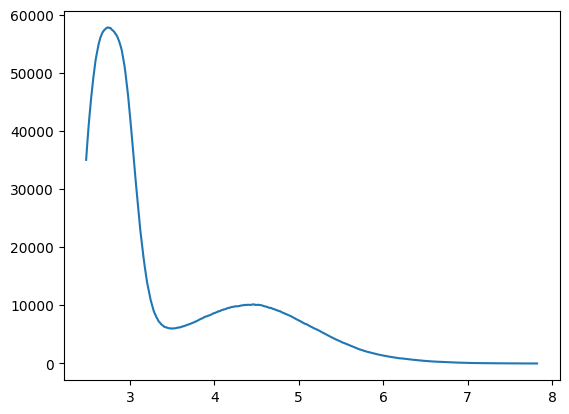

In [120]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(min_data, max_data, len(gr)), gr/normalzie)

In [96]:
import numpy as np

r = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])  # Midpoints of bins
number_of_atoms = np.array([8, 6, 4, 10, 6, 4, 2])  # Histogram data
dr = 1.0  # Bin width in Å

In [97]:
shell_volume = 4 * np.pi * r**2 * dr
print(shell_volume)
# Output: [6.28, 28.27, 62.83, 110.46, 172.79, 249.92, 341.89] (approx. in Å³)

[  3.14159265  28.27433388  78.53981634 153.93804003 254.46900494
 380.13271108 530.92915846]


In [98]:
rho_0 = 40 / 4699  # Approximate density
expected_atoms = rho_0 * shell_volume
g_r = number_of_atoms / expected_atoms
print(g_r)
# Output: [1.51, 0.67, 0.20, 0.29, 0.11, 0.05, 0.02] (approx., values will vary with exact V)

[299.14763104  24.92896925   5.98295262   7.63131712   2.76988547
   1.23614724   0.44252608]


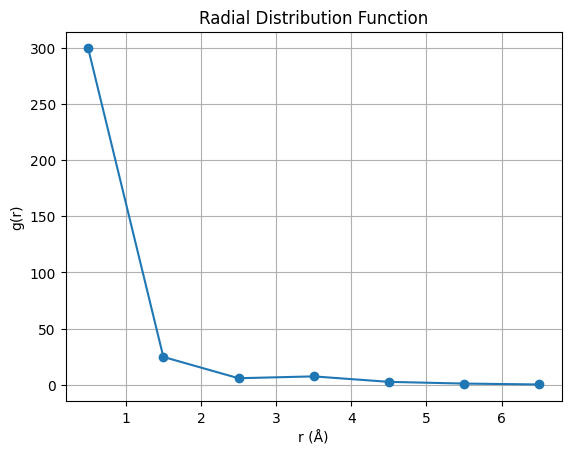

In [99]:
import matplotlib.pyplot as plt

plt.plot(r, g_r, '-o')
plt.xlabel('r (Å)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function')
plt.grid()
plt.show()

g(r): [296.21765162  24.6848043    5.92435303   7.55657275   2.74275603
   1.22403988   0.43819179]


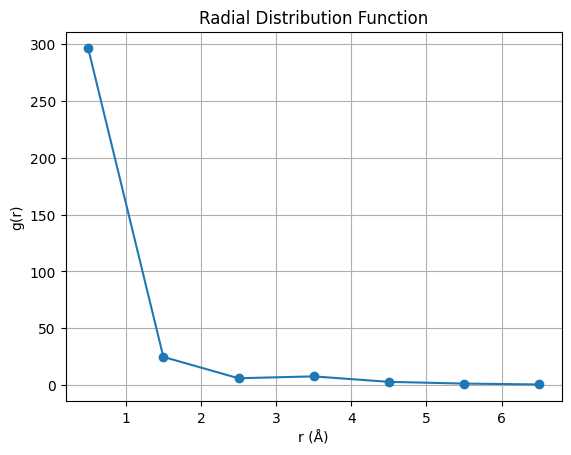

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Your histogram data
r = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])  # Midpoints of bins
number_of_atoms = np.array([8, 6, 4, 10, 6, 4, 2])  # Histogram data
dr = 1.0  # Bin width in Å
V = 12.991 * 11.832 * 30.577  # Box volume in Å³
N_total = 100  # Total number of oxygen atoms (adjust if known)
N_ref = 10  # Number of reference particles (adjust if known)
snapshots = 1  # Number of snapshots (adjust if multiple)

# Shell volume
shell_volume = 4 * np.pi * r**2 * dr

# Average density
rho_0 = N_total / V

# Total expected pairs (approximate, based on random distribution)
total_pairs = N_ref * (N_total - 1) * snapshots  # Total possible pairs
histogram_sum = np.sum(number_of_atoms)  # 40

# Normalize g(r) to ensure it converges to 1
# Scale factor to make the sum of g(r) match the expected distribution
scale_factor = total_pairs / histogram_sum  # Should be ~1 if data is complete
expected_pairs_per_bin = rho_0 * shell_volume * N_ref * snapshots
g_r = (number_of_atoms * scale_factor) / expected_pairs_per_bin

print("g(r):", g_r)

# Plot
plt.plot(r, g_r, '-o')
plt.xlabel('r (Å)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function')
plt.grid()
plt.show()

In [102]:
cumulative_pairs = np.cumsum(number_of_atoms)  # Running total of pairs
total_pairs_observed = cumulative_pairs[-1]  # 40
g_r = number_of_atoms / (rho_0 * shell_volume)  # Initial guess
g_r = g_r / g_r[-1] * 1.0  # Scale to 1 at the last point

In [104]:
g_r = number_of_atoms / (rho_0 * shell_volume)
g_r = g_r / g_r[-1]  # Force convergence to 1 at 6.5 Å
print("g(r):", g_r)

g(r): [676.          56.33333333  13.52        17.24489796   6.25925926
   2.79338843   1.        ]


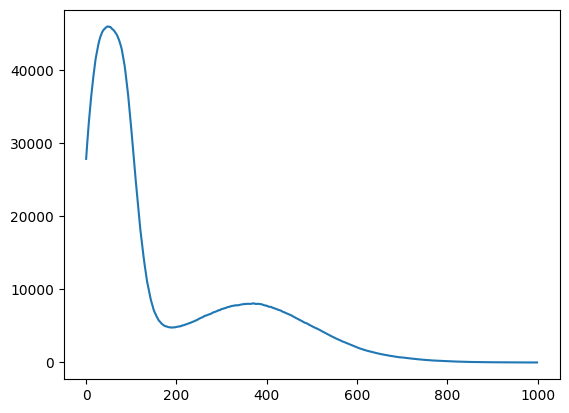

In [105]:
plt.plot(gr)

# Create configuration file for arbitrary number of water molecules


In [3]:
import numpy as np

In [1]:
unit_length = 25.196959335562

water_box_edge = 0.73*2 + 0.32*4 + 0.2
print(water_box_edge)
num_water = int(unit_length/water_box_edge)**3
print(num_water)

num_simulate_water = 20

2.9400000000000004
512


In [10]:
import numpy as np

In [4]:
initial_water_position = np.array([[0,0,0], [0,0, 0.95], [0, 0.95*np.sin(np.pi/180*105), 0.95*np.cos(np.pi/180*105)]]) # Oxygen - Hydrogen - Hydrogen

water_position = [(initial_water_position).tolist()]

for i in range(1, 5):
    for j in range(1,6):
        water_position.append((initial_water_position + np.array([i*water_box_edge,j*water_box_edge, 0])).tolist())

water_position = np.array(water_position[1:])

# print(water_position)

In [11]:
initial_water_position = np.array([[0,0,0], [0,0, 0.95], [0, 0.95*np.sin(np.pi/180*105), 0.95*np.cos(np.pi/180*105)]]) # Oxygen - Hydrogen - Hydrogen

water_position = [(initial_water_position).tolist()]

for i in range(1, 4):
    for j in range(1, 4):
        for k in range(1, 4):
            water_position.append((initial_water_position + np.array([i*water_box_edge,j*water_box_edge, k*water_box_edge])).tolist())

water_position = np.array(water_position[1:])

# print(water_position)

In [133]:
np.shape(water_position)

(512, 3, 3)

125

In [ ]:
6.022/

In [ ]:
20*

375

In [8]:
# - 17933.2781739
# Writing (overwrites existing content)
with open('/home/linh/Numerical method 2/Part 2/NumericalII2025/NumericalII2022/MDTutorial/Exercises/Exc1/final_exam-300/CONFIG', 'w') as file:
    file.write('''amber
         0         2        60  -71733.1126956    
     25.196959335562      0.000000000000      0.000000000000
      0.000000000000     25.196959335562      0.000000000000
      0.000000000000      0.000000000000     25.196959335562''')
    file.write("\n")
    for i in range(0, np.shape(water_position)[0]):
        file.write("OW"+ f"{3*i+1:20.0f}")
        file.write("\n")
        # position - velocity - force
        file.write(" ".join(f"{x:16.9}" + "    " for x in water_position[i][0]))
        file.write("\n")
        # vec = np.random.uniform(-10, 10, 3)
        # force = np.random.uniform(-10**4, 10**4, 3)
        # file.write(" ".join(f"{x:20.9f}" for x in vec))
        # file.write("\n")
        # file.write(" ".join(f"{x:20.9f}" for x in force))
        # file.write("\n")

        file.write("HW"+ f"{3*i+2:20.0f}")
        file.write("\n")
        # position - velocity - force
        file.write(" ".join(f"{x:16.9}" + "    " for x in water_position[i][1]))
        file.write("\n")
        # vec = np.random.uniform(-10, 10, 3)
        # force = np.random.uniform(-10**4, 10**4, 3)
        # file.write(" ".join(f"{x:20.9f}" for x in vec))
        # file.write("\n")
        # file.write(" ".join(f"{x:20.9f}" for x in force))
        # file.write("\n")

        file.write("HW"+ f"{3*i+3:20.0f}")
        file.write("\n")
        # position - velocity - force
        file.write(" ".join(f"{x:16.9}" + "    " for x in water_position[i][2]))
        file.write("\n")
        # vec = np.random.uniform(-10, 10, 3)
        # force = np.random.uniform(-10**4, 10**4, 3)
        # file.write(" ".join(f"{x:20.9f}" for x in vec))
        # file.write("\n")
        # file.write(" ".join(f"{x:20.9f}" for x in force))
        # file.write("\n ")

In [29]:
x = -5.6

print(f"{x:16.9}" + "    ")

            -5.6    


In [25]:
print(len("-8.432293769"))
print(len("10.82055068"))
print(len("7.967560970"))

12
11
11


In [26]:
print(len("    -8.432293769"))
print(len("         10.82055068"))
print(len("         7.967560970    "))

16
20
24


In [ ]:
"         2.940000000          2.940000000          0.000000000"
"    -8.432293769         10.82055068         7.967560970    "



In [253]:
vec = np.random.uniform(-10, 10, 3)
print(vec)

force = np.random.uniform(-10**4, 10**4, 3)
print(force)

[-6.45590767 -3.953547    1.63033083]
[-4516.38101344  5899.02796348 -2945.5194303 ]


In [ ]:
import numpy as np

# Define the array
my_array = np.array( [ 0.,          0.91762953 ,-0.24587809])

# Print the array with custom formatting

print(" ".join(f"{x:16.9f}" for x in my_array))

     0.000000000      0.917629530     -0.245878090


In [1]:
a = "    -8.432293769         10.82055068         7.967560970    "

In [3]:
import numpy as np
print((a).length)

AttributeError: 'str' object has no attribute 'length'

In [5]:
18/(6.022*10**23/())

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [39]:
6.022*25.2**3/180

535.3895232

In [64]:
data300 = position_distribution("/home/linh/Numerical method 2/Part 2/NumericalII2025/NumericalII2022/MDTutorial/Exercises/Exc1/final_exam/combine.txt")
data300.sample_dis()

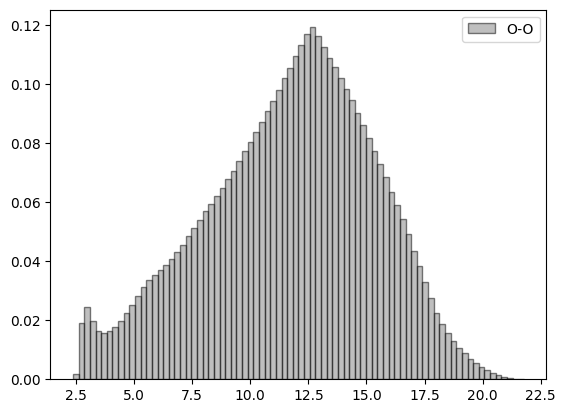

In [73]:
data300.plot(bins=80)

In [ ]:
counts300, bins300 = np.histogram(data300.dis_r, bins=1000)
normalzie300 = np.shape(data300.dis_r)/(4/3*np.pi*np.max(data300.dis_r)**3)
counts300 = counts300 /4/np.pi/bins300[1:]**2/(bins300[1] - bins300[0])

(2.0, 12.0)

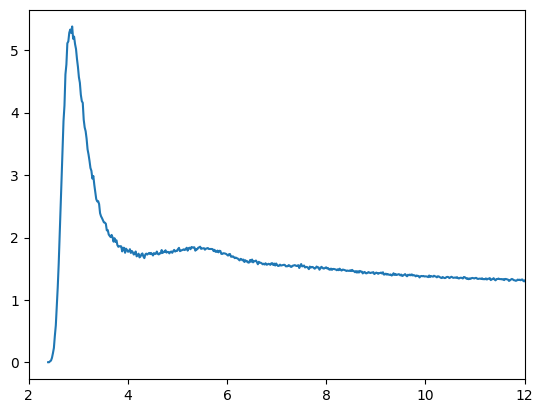

In [76]:
plt.plot(bins300[1:], counts300/normalzie300/2) 
plt.xlim(2, 12)

In [94]:
data200 = position_distribution("/home/linh/Numerical method 2/Part 2/NumericalII2025/NumericalII2022/MDTutorial/Exercises/Exc1/final_exam-200/combine.txt")
data200.sample_dis()

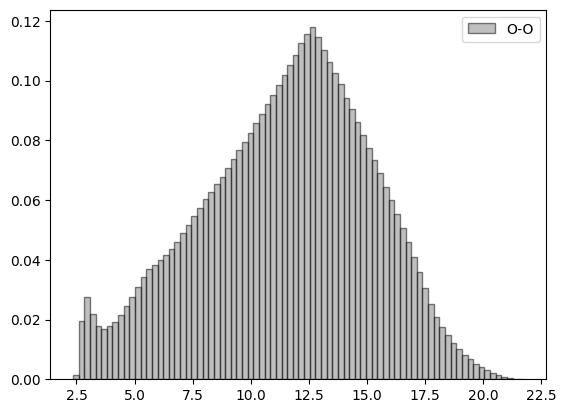

In [98]:
data200.plot(bins=80)

In [99]:
counts200, bins200 = np.histogram(data200.dis_r, bins=1000)
normalzie200 = np.shape(data200.dis_r)/(4/3*np.pi*np.max(data200.dis_r)**3)
counts200 = counts200 /4/np.pi/bins200[1:]**2/(bins200[1] - bins200[0])

(2.0, 12.0)

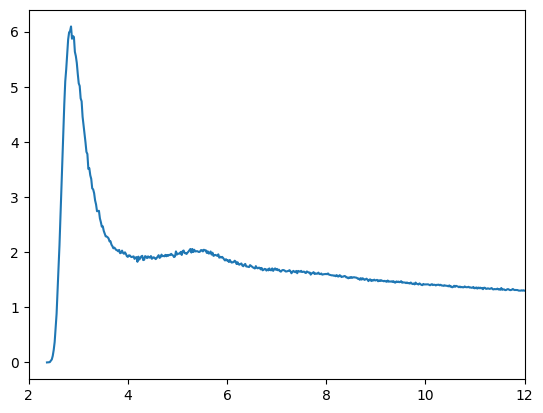

In [100]:
plt.plot(bins200[1:], counts200/normalzie200/2) 
plt.xlim(2, 12)

In [102]:
data150 = position_distribution("/home/linh/Numerical method 2/Part 2/NumericalII2025/NumericalII2022/MDTutorial/Exercises/Exc1/final_exam-150/combine.txt")
data150.sample_dis()

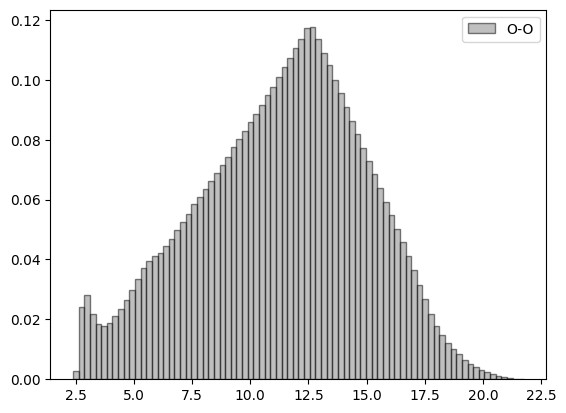

In [103]:
data150.plot(bins=80)

In [104]:
counts150, bins150 = np.histogram(data150.dis_r, bins=1000)
normalzie150 = np.shape(data150.dis_r)/(4/3*np.pi*np.max(data150.dis_r)**3)
counts150 = counts150 /4/np.pi/bins150[1:]**2/(bins150[1] - bins150[0])

(2.0, 12.0)

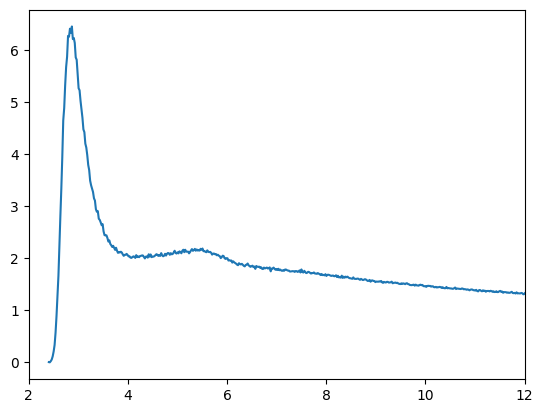

In [105]:
plt.plot(bins150[1:], counts150/normalzie150/2) 
plt.xlim(2, 12)

In [122]:
data500 = position_distribution("/home/linh/Numerical method 2/Part 2/NumericalII2025/NumericalII2022/MDTutorial/Exercises/Exc1/final_exam-500/combine.txt")
data500.sample_dis()

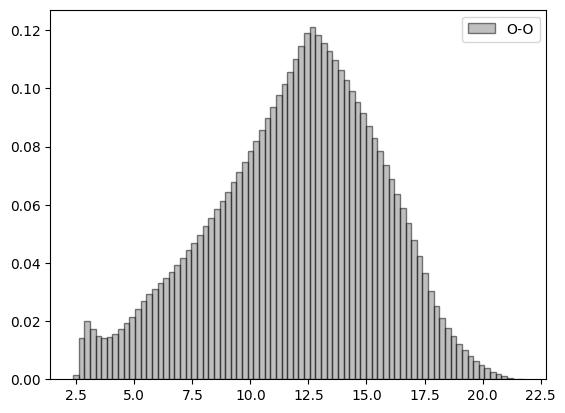

In [123]:
data500.plot(bins=80)

In [124]:
counts500, bins500 = np.histogram(data500.dis_r, bins=1000)
normalzie500 = np.shape(data500.dis_r)/(4/3*np.pi*np.max(data500.dis_r)**3)
counts500 = counts500 /4/np.pi/bins500[1:]**2/(bins500[1] - bins500[0])

(2.0, 12.0)

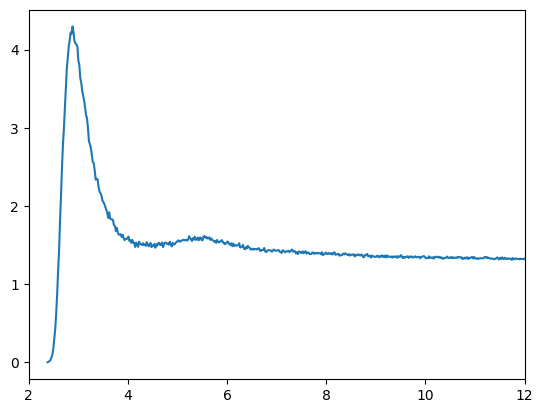

In [125]:
plt.plot(bins500[1:], counts500/normalzie500/2) 
plt.xlim(2, 12)

In [118]:
data1 = position_distribution("/home/linh/Numerical method 2/Part 2/NumericalII2025/NumericalII2022/MDTutorial/Exercises/Exc1/final_exam-100/combine.txt")
data1.sample_dis()

In [119]:
counts, bins = np.histogram(data1.dis_r, bins=1000)
normalzie = np.shape(data1.dis_r)/(4/3*np.pi*np.max(data1.dis_r)**3)
counts = counts /4/np.pi/bins[1:]**2/(bins[1] - bins[0])

(2.0, 12.0)

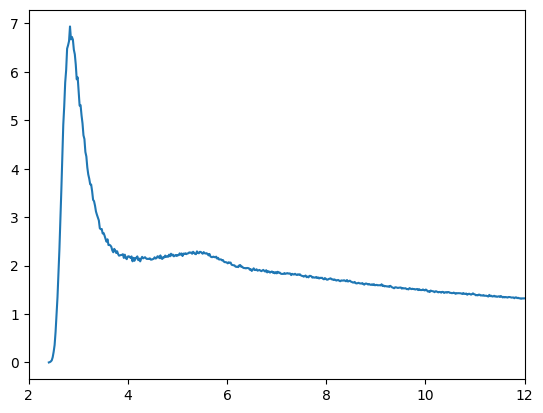

In [120]:
plt.plot(bins[1:], counts/normalzie/2) 
plt.xlim(2, 12)

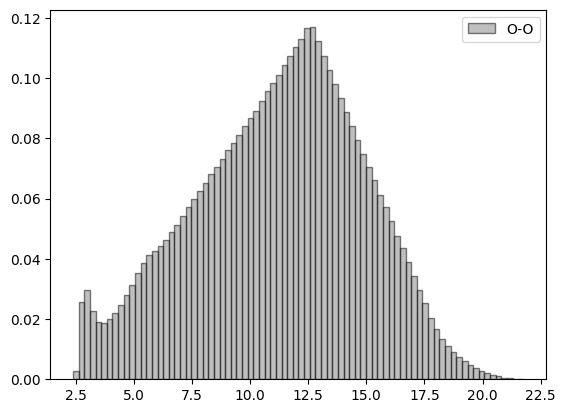

In [121]:
data1.plot(bins=80)

(2.0, 7.0)

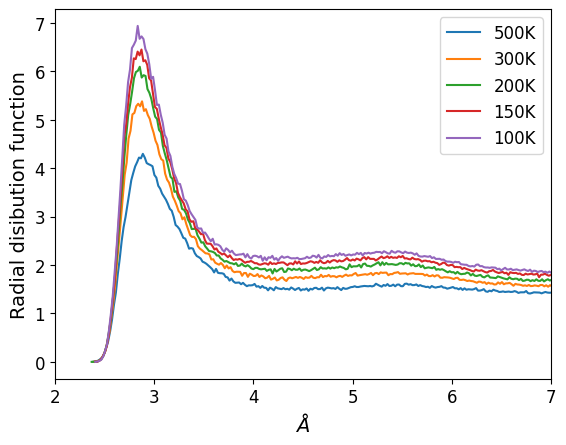

In [128]:
fontsize = 12
linewidth = 1.5
plt.plot(bins500[1:], counts500/normalzie500/2, label="500K", lw=linewidth) 
plt.plot(bins300[1:], counts300/normalzie300/2, label="300K", lw=linewidth) 
plt.plot(bins200[1:], counts200/normalzie200/2, label="200K", lw=linewidth) 
plt.plot(bins150[1:], counts150/normalzie150/2, label="150K", lw=linewidth) 
plt.plot(bins[1:], counts/normalzie/2, label="100K", lw=linewidth) 

plt.legend(fontsize=fontsize)
plt.xlabel(r"$\AA$",fontsize=fontsize+2)
plt.ylabel("Radial disibution function" ,fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)  # X-axis tick labels
plt.yticks(fontsize=fontsize)  # Y-axis tick labels
plt.xlim(2, 7)

In [127]:
plt.savefig("Water radial distribution function", dpi=200)

<Figure size 640x480 with 0 Axes>

### summary code further, make verything done with a button :)))

In [5]:
import numpy as np

In [24]:

bigdata = position_distribution("/home/linh/Numerical method 2/Part 2/NumericalII2025/NumericalII2022/MDTutorial/Exercises/Exc1/final_exam_512water_molecules_300K_much_smaller_unitcell/combine.txt")
bigdata.sample_dis()

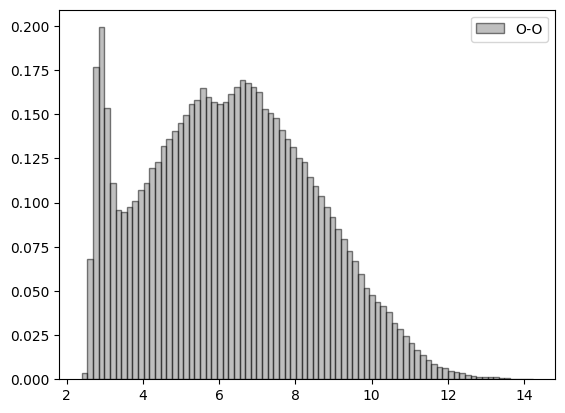

In [25]:
bigdata.plot(bins=80)

In [36]:
counts_bigdata, bins_bigdata = np.histogram(bigdata.dis_r, bins=300)
normalzie_bigdata = np.shape(bigdata.dis_r)/(4/3*np.pi*np.max(bigdata.dis_r)**3)
counts_bigdata = counts_bigdata /4/np.pi/bins_bigdata[1:]**2/(bins_bigdata[1] - bins_bigdata[0])

(2.0, 7.0)

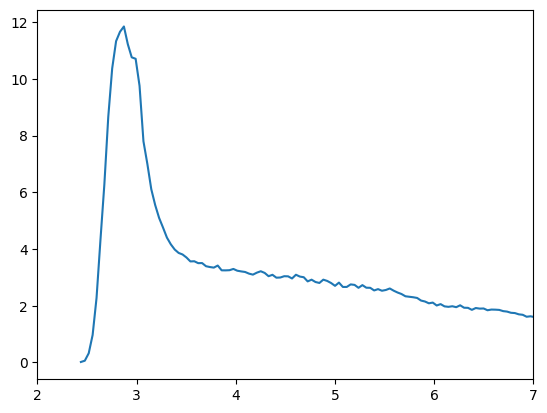

In [39]:
plt.plot(bins_bigdata[1:], counts_bigdata/normalzie_bigdata/2) 
plt.xlim(2, 7)